# Optimizing

In [1]:
from fyp_code import loukas_esn, optimize2, utilities as util
from colorama import Fore
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from mpl_toolkits import mplot3d
plt.rcParams["figure.figsize"] = [4,3]
plt.rcParams['figure.dpi'] = 200

In [2]:
# initialise input data
data_mg = util.data_mg()
data_sin1 = util.data_sin(order=1)
data_sin2 = util.data_sin(order=2)
data_sin3 = util.data_sin(order=3)

# initialise parameter spaces for mg
rhos_mg = np.linspace(0.7,1.3,30)
alphas_mg = np.linspace(0.3,0.9,30)
betas_mg = np.logspace(-8,-2,30)

rho_mg = 1
alpha_mg = 0.7
beta_mg = 1e-7
sparse_mg = 0.7

# initialise parameter spaces for sin3
rhos_sin3 = np.linspace(0.7,1.3,30)
alphas_sin3 = np.linspace(0.3,0.9,30)
betas_sin3 = np.logspace(-8,-2,30)

rho_sin3 = 1
alpha_sin3 = 0.7
beta_sin3 = 1e-7
sparse_sin3 = 0.7

N = 500
inodes = 1      # input nodes
onodes = 1      # output nodes
ttr = 1000      # training time
twash = 200     # washout time

In [4]:
# initialise Optimizer2 object
esn_mg = loukas_esn.Esn(data_mg, rho_mg, alpha_mg, beta_mg, inodes, onodes, ttr, twash, N, sparse_mg, seed_init=5267)
opt_mg = optimize2.Optimizer2(esn_mg, rhos_mg, alphas_mg, betas_mg)

esn_sin3 = loukas_esn.Esn(data_sin3, rho_sin3, alpha_sin3, beta_sin3, inodes, onodes, ttr, twash, N, sparse_mg, seed_init=5267)
opt_sin3 = optimize2.Optimizer2(esn_sin3, rhos_sin3, alphas_sin3, betas_sin3)

## Grid-search functions

#### Optimize rho

In [ ]:
opt_mg_r = opt_mg.opt_rho(mute=False)

In [ ]:
opt_sin3_r = opt_sin3.opt_rho(mute=False)

#### Optimize alpha

In [ ]:
opt_a = opt_mg.opt_alpha(mute=True)
print("optimal alpha: {}\nnmse: {}\nalpha/nmse dictionary: {}".format(opt_a[0],opt_a[1],opt_a[2]))

#### Optimize rho + alpha

In [ ]:
rs, als, ns = opt_mg.opt_rho_alpha()
#rs

In [ ]:
rs, als, ns = opt_sin3.opt_rho_alpha()

#### Optimize beta

In [ ]:
opt_bv = opt_mg.opt_beta_val(mute=True)
optimize2.print_optimal(opt_bv[2],"beta")

In [ ]:
opt_bt = opt_mg.opt_beta_test(mute=False)

#### Optimize W sparsity

In [ ]:
opt_Ws = opt_mg.opt_W_sparsity(start=0.2,end=0.75,count=13.6,mute=False)

## Plotting optimizations

#### Plotting rho

In [ ]:
rn = opt_mg.collect_rhos(mute=False)
opt_mg.plot_rhos(rn)

opt_rho = optimize2.min_from_dict(rn)
print(Fore.GREEN + "\nOptimal rho: {}, nmse: {}".format(opt_rho,rn[opt_rho]))

#### Plotting alpha

In [ ]:
an = opt_mg.collect_alphas(mute=False)
opt_mg.plot_alphas(an)

opt_alpha = optimize2.min_from_dict(an)
print(Fore.GREEN + "\nOptimal alpha: {}, nmse: {}".format(opt_alpha,an[opt_alpha]))

#### Plotting beta

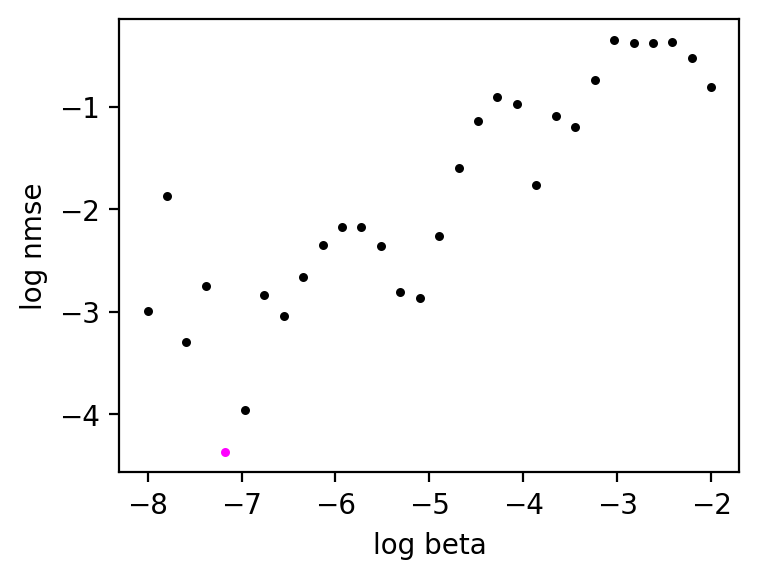


Optimal beta: 6.723357536499335e-08, nmse: 4.282303260562559e-05


In [5]:
bn = opt_mg.collect_betas(mute=True)
opt_mg.plot_betas(bn)

opt_beta = optimize2.min_from_dict(bn)
print(Fore.GREEN + "\nOptimal beta: {}, nmse: {}".format(opt_beta,bn[opt_beta]))

In [ ]:
bn = opt_sin3.collect_betas(mute=False)
opt_sin3.plot_betas(bn)

opt_beta = optimize2.min_from_dict(bn)
print(Fore.GREEN + "\nOptimal beta: {}, nmse: {}".format(opt_beta,bn[opt_beta]))

#### Plotting W sparsity

Changes in W sparsity have a minimal effect on performance once sufficiently distant from the extremes, 0 and 1. Even 0.05-0.95 qualifies at sufficiently distant.

Additionally, changing sparsity unavoidably affects the random nature of the W matrix, so if other parameters have been optimized for a W matrix of particular sparsity, there's no guarantee these parameters will be optimal for any other sparsity or W matrix by extension.

In other words, sparsity optimization is available but low priority. Could be useful if other parameters are fixed and unoptimizable.

In [ ]:
sn = opt_mg.collect_W_sparsities(start=0.1,end=0.9,count=20,mute=True)
opt_mg.plot_W_sparsities(sn)

optimize2.print_optimal(sn,"W sparsity")

## Equality checking

In [ ]:
# make a copy of the esn to check
e1 = copy.deepcopy(opt_mg.esn)

In [ ]:
# run opt_mg for some optimization and then come back here to check if/how any variables changed (they shouldn't have)
loukas_esn.compare_vars(e1,opt_mg.esn)

In [ ]:
# see what happens when they do change:
e1 = copy.deepcopy(opt_mg.esn)
e1.set_rho(0.96)
e1.set_beta(5)
e1.set_alpha(6.4e-3)
e1.W = np.random.uniform(low=-1.5, high=1.5, size=(N_mg,N_mg))
loukas_esn.compare_vars(e1,opt_mg.esn)

## Example optimization script

In [ ]:
# initialise input data
data_mg = util.data_mg()

# initialise parameter spaces
rhos_mg = np.linspace(0.7,1.3,20)
alphas_mg = np.linspace(0.3,0.9,20)
betas_mg = np.logspace(-8,-3,20)

# initialise parameter values
rho_mg = 1.1
alpha_mg = 0.7
beta_mg = 1e-7
sparse_mg = 0.5
N_mg = 500

inodes = 1      # input nodes
onodes = 1      # output nodes
ttr = 1000      # training time
twash = 200     # washout time

# initialise Esn & Optimizer2 object
esn_0 = loukas_esn.Esn(data_mg, rho_mg, alpha_mg, beta_mg, inodes, onodes, ttr, twash, N_mg, sparse_mg)       # keep this unchanged
esn_mg = copy.deepcopy(esn_0)                                                                                 # optimize this one
opt_mg = optimize2.Optimizer2(esn_mg, rhos_mg, alphas_mg, betas_mg, test_time=1000)

# optimize for rho/alpha
r, a, n = opt_mg.opt_rho_alpha()

# set new improved rho/alpha values
opt_mg.esn.set_rho(r)
opt_mg.esn.set_alpha(a)

# optimize for beta with new rho/alpha values
b, nb, bdict = opt_mg.opt_beta_test(mute=True)
optimize2.print_optimal(bdict, "beta")

# set new improved beta value
opt_mg.esn.set_beta(b)

In [ ]:
# see the difference
esn_0.train()
esn_0.test(test_time=1000)
esn_0.plot_test()
print(Fore.CYAN + "Original ESN: nmse test = {}".format(esn_0.nmse_test))
print(Fore.GREEN + "rho = {}\nalpha = {}\nbeta = {}".format(rho_mg,alpha_mg,beta_mg))

In [ ]:
esn_mg.train()
esn_mg.test(test_time=1000)
esn_mg.plot_test()
print(Fore.CYAN + "Optimized ESN: nmse test = {}".format(esn_mg.nmse_test))
print(Fore.GREEN + "rho = {}\nalpha = {}\nbeta = {}".format(r,a,b))

### Further optimization

In [ ]:
# reset esn activations to initial conditions
esn_mg.reset_x()

# optimize for W sparsity with new rho, alpha, beta
s, ns, sdict = opt_mg.opt_W_sparsity(start=0.2,end=0.95,count=20)

# set new improved W sparsity value
opt_mg.esn.set_W_sparsity(s)

In [ ]:
# see the difference
esn_mg.train()
esn_mg.test(test_time=1000)
esn_mg.plot_test()
print(Fore.CYAN + "Optimized ESN: nmse test = {}".format(esn_mg.nmse_test))
print(Fore.GREEN + "rho = {}\nalpha = {}\nbeta = {}\nW-sparsity = {}".format(r,a,b,s))

In [ ]:
ns[360] = 200

In [ ]:
index = ns.index(min(ns))
index

In [ ]:
ro = rs[index]
ro

In [ ]:
ao = als[index]
ao

In [ ]:
ns[index]

## 3D Plotting

In [ ]:
k = 4
plt.rcParams["figure.figsize"] = [k,k]
plt.rcParams['figure.dpi'] = 200

In [ ]:
x = rs[:-32]
y = als[:-32]
z = ns[:-32]

fig = plt.figure()
plt.rcParams.update({'font.size': 7})
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='viridis', s=5);
ax.set_xlabel("rho")
ax.set_ylabel("alpha")
ax.set_zlabel("nmse")
ax.view_init(15, -55)

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.scatter3D(rs[:-32], als[:-32], ns[:-32], c=ns[:-32].reverse(), cmap='Greens');
ax.contour3D(rs[:-32], als[:-32], ns[:-32], 50, cmap='binary')
ax.view_init(20, 65)

In [3]:
rho_mg = 1.3
alpha_mg = 0.506896551724138
#beta 1.7433288221999873e-07

In [ ]:
rho_sin3 = 0.9896551724137931
alpha_sin3 = 0.3